# **A simple ML model for Binary classification using K-NN algorithm**
This model is developed to predict income level based on on the individual’s personal information. An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.  

The dataset that has been used is 'Adult Income dataset' from UCI Machine Learning repository. More info at http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

**Problem Statement :** Predict and Classify whether the income of the person is > 50k or <=50k using personal information divided 14 different input attributes.

# Mounting the drive and Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix,plot_precision_recall_curve,plot_roc_curve

Using Adult Income Dataset for KNN classification and specifying the path to the dataset. 

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/adult.csv')

# Data Analysis 
Analysing the Adult Income Dataset.

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.describe()

# Data Preprocessing and Visualisation

Check for null values if any

In [ ]:
data.isnull().sum().sum()

**Changing income column values into 0's and 1's:**


> 0 -> income is less than or equal to 50K and 1 -> income is more than 50K


In [ ]:
data['income'].value_counts()

In [17]:
data['income'] = data['income']==('<=50K')
data['income'] = data['income'].astype(int)

In [ ]:
data['income']

In [ ]:
data['income'].value_counts()

Creating 2 seperate data frames one with numerical data, other with categorical data

In [20]:
data_cat = data.select_dtypes(include='object')
data_nums = data.select_dtypes(exclude='object')

In [ ]:
data_nums

In [23]:
data_nums.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

**Visualising and Plotting**

Plotting distributions for num columns

In [ ]:
for i in ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss','hours-per-week']:
    sns.displot(data[i],kde=True,bins=30)
    plt.show()

Plotting the pair plot

In [ ]:
sns.pairplot(data_nums,x_vars=['age','hours-per-week'],y_vars=['age', 'hours-per-week'],hue='income')

Standardising the columns of numerical data as to normalise the distances for better performance of the KNN

In [ ]:
for i in ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss','hours-per-week']:
    data_nums[i] = (data_nums[i]-np.mean(data_nums[i]))/(np.std(data_nums[i]))

In [ ]:
data_nums

Plotting the categorical data

In [ ]:
for i in ['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'gender', 'native-country']:
    sns.countplot(x=i,data=data_cat)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
data_cat = data_cat.replace(to_replace ="?",value ="Private")
data_cat

In [ ]:
sns.countplot(x='workclass',data=data_cat)
plt.xticks(rotation=90)
plt.show()

Creating dummy variables for different categories

In [ ]:
data_cat = pd.get_dummies(data_cat)
data_cat

Concatenating both the data frames, numerical data and categorical data into final data frame.

In [ ]:
data = pd.concat([data_nums,data_cat], axis=1)
data.head()

**Declaring the output attribute and splitting the data into training and testing**

> Splitting the data into - Training data(80%) and Testing data(20%)



In [42]:
x = data.drop('income',axis=1)
y = data['income']
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.2,random_state=101)

# Implementing KNN Algorithm

Using knn classifier function with initially testin for k = 1.

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)

Fitting the KNN model to the training dataset i.e training of the model.

In [ ]:
knn.fit(x_train,y_train)

Predicting the model output and testing it using testing dataset

In [53]:
pred = knn.predict(x_test)

Finding the accuracy of the model using the corresponding predicted value the given labeled output value in the test samples

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
print(classification_report(y_test, pred))

**Confusion Matrix**

In [56]:
confusion_matrix(y_test, pred)

array([[1405,  962],
       [ 987, 6415]])

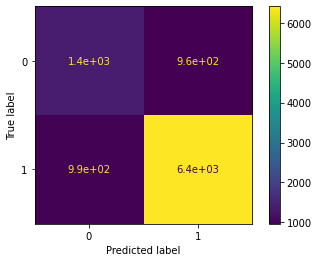

In [57]:
plot_confusion_matrix(knn,x_test,y_test)

It can be scene that our KNN model has given the accuracy of 80.04% for k=1. However we can always variate the value 'k' to find the optimum k for the best accuracy results. Hence finding desired value of 'k' is crucial for better performance of the model.  

# Finding the optimum value of k


> Here what we do is take some k values, train the model using that k and find the error (1 - accuracy), then choose the value of K with least error



In [58]:
error= []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    error.append(1-(accuracy_score(y_test,pred)))

Plotting 'Error vs K' graph to estimate optimum k value

In [ ]:
plt.plot(range(1,30),error,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.title('Error vs K')

From the above graph the minimum error with smallest k can be chosen at k=18. Here the error is very low and it is also the samllest k value with one of the lowest errors. 


> Hence we declare K = 18 and predict output for the same.




In [60]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [61]:
pred = knn.predict(x_test)

In [62]:
accuracy_score(y_test,pred)

0.8457365134609479

Hence we can find the accuracy of our model with k=18 comes out to be **84.57%** which is better than that for k=1

**Confusion Matrix**

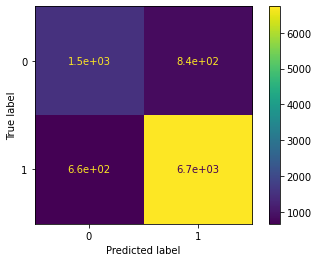

In [63]:
plot_confusion_matrix(knn,x_test,y_test)

Examining the final classification report

In [64]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      2367
           1       0.89      0.91      0.90      7402

    accuracy                           0.85      9769
   macro avg       0.79      0.78      0.78      9769
weighted avg       0.84      0.85      0.84      9769

